In [1]:
import numpy as np


In [2]:
A = np.array([[11,12,13,14],[15,16,17,18]])

In [3]:
# least squares ax + b = y
# input data    A x = b (여기서는 x 가 위쪽의 (a, b))
x = np.array([1,2,3,4])
y = np.array([-1,0.2,0.9,2.1])


In [4]:
# concatenate a constant
A = np.vstack([x,np.ones(len(x))]).T
A

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

In [5]:
At_A = A.T.dot(A) # dot(At, A) x   = dot(At, y)
At_A

array([[30., 10.],
       [10.,  4.]])

In [6]:
At_y = A.T.dot(y)
At_y

array([10.5,  2.2])

In [7]:
from numpy.linalg import solve
c = solve(At_A, At_y)
c

array([ 1.  , -1.95])

In [8]:
y_fitted = A.dot(c)
y_fitted

array([-0.95,  0.05,  1.05,  2.05])

In [9]:
fake_x = np.array([-1.5,4.5])
B = np.vstack([fake_x,np.ones(len(fake_x))]).T
fake_y = np.dot(B,c)
fake_y

array([-3.45,  2.55])

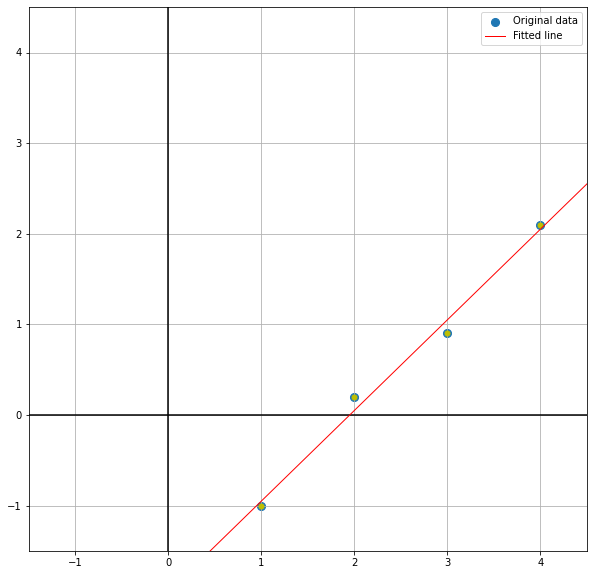

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.grid()
plt.ylim(-1.5,4.5)
plt.xlim(-1.5,4.5)
plt.hlines(0,-1.5,4.5,"black")
plt.vlines(0,-1.5,4.5,"black")
plt.scatter(x,y,label="Original data",s=65)
plt.plot(x,y,'oy',markersize=5)
plt.plot(fake_x,fake_y,'r', label='Fitted line',linewidth=1.0)
plt.legend()
plt.show()

In [11]:
error = y - y_fitted
error

array([-0.05,  0.15, -0.15,  0.05])

In [12]:
# calculate error
np.sqrt((error**2).sum())

0.22360679774997894

In [13]:
from numpy.linalg import norm
norm(y-y_fitted)

0.22360679774997894

In [14]:
A = np.array([[60,5.5,1],[65,4.8,0],[55,6.0,1],[50,5.0,1],[119,6.5,1]])
# A = np.vstack([A.T,np.ones(len(A))]).T
b = np.array([66,70,78,72,65])
At_A = A.T.dot(A)
At_b = A.T.dot(b)
x = solve(At_A,At_b)
span_life = A.dot(x.T)
print(span_life,b,sep='\n')
norm(span_life-b)

[69.80506719 68.68213733 81.80139342 63.97899686 65.41454253]
[66 70 78 72 65]


9.755727909946744

In [15]:
A = np.array([[60,5.5,1],[65,4.8,0],[55,6.0,1],[50,5.0,1],[119,6.5,1]])
A = np.vstack([A.T,np.ones(len(A))]).T
b = np.array([66,70,78,72,65])
A

array([[ 60. ,   5.5,   1. ,   1. ],
       [ 65. ,   4.8,   0. ,   1. ],
       [ 55. ,   6. ,   1. ,   1. ],
       [ 50. ,   5. ,   1. ,   1. ],
       [119. ,   6.5,   1. ,   1. ]])

In [16]:
At_A = A.T.dot(A)
At_A

array([[2.7511e+04, 1.9955e+03, 2.8400e+02, 3.4900e+02],
       [1.9955e+03, 1.5654e+02, 2.3000e+01, 2.7800e+01],
       [2.8400e+02, 2.3000e+01, 4.0000e+00, 4.0000e+00],
       [3.4900e+02, 2.7800e+01, 4.0000e+00, 5.0000e+00]])

In [17]:
At_b = A.T.dot(b)
At_b

array([24135. ,  1949.5,   281. ,   351. ])

In [18]:
x = solve(At_A,At_b)
x

array([-0.25429839,  8.47365502, -6.27418192, 45.85585136])

In [19]:
span_life = A.dot(x.T)
print(span_life,b,sep='\n')
norm(span_life-b)

[70.92886855 70.         76.43718802 69.23502496 64.39891847]
[66 70 78 72 65]


5.894277943836839

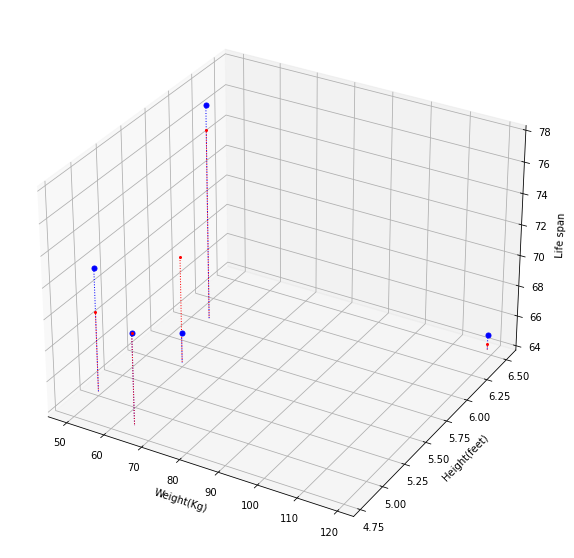

In [20]:
# 어차피 차원이 커서 못보니, 몸무게, 키가 수명에 미치는 영향만 봐봅시다.
from mpl_toolkits.mplot3d import Axes3D


first_3d = plt.figure(figsize=(10,10))
first_axe = plt.axes(projection='3d')
first_axe.set_xlabel('Weight(Kg)')
first_axe.set_ylabel('Height(feet)')
first_axe.set_zlabel('Life span')
for i in range(5):
    first_axe.plot3D([A[i,0]]*2,[A[i,1]]*2,[b[i],min(b)-1],':b',linewidth=1.0)
    first_axe.plot3D([A[i,0]]*2,[A[i,1]]*2,[span_life[i],min(b)-1],':r',linewidth=1.0)

first_axe.plot3D(A[:,0],A[:,1],b,'ob',markersize=5)
first_axe.plot3D(A[:,0],A[:,1],span_life,'or',markersize=2)

# plt.grid()
# plt.ylim(-1.5,4.5)
# plt.xlim(-1.5,4.5)
# plt.hlines(0,-1.5,4.5,"black")
# plt.vlines(0,-1.5,4.5,"black")
# plt.scatter(x,y,label="Original data",s=65)
# plt.plot(x,y,'oy',markersize=5)
# plt.plot(fake_x,fake_y,'r', label='Fitted line',)
# plt.legend()


plt.show()

In [129]:
with open("text.txt",'a') as f:
    f.write("hi")